In [78]:
# encoding: utf-8

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py
from matplotlib.backends.backend_pdf import PdfPages


dir = '/Users/maeda/Desktop/Dropbox/analysis/test-feedback/samplecnvturbc2/'
im=128
jm=128
km=128
num=6
nstep = 20
#itime = 1
#ftime = 104
itime = 25
ftime = 25
timejump=1

dl=80.0/128.0



In [43]:
stx=[0] *7
sty=[0] *7

'''
stx[0]=-34.6654015+80.0
stx[1]=-27.6792831+80.0
stx[2]=-32.8830986+80.0
stx[3]=-29.9852009+80.0
stx[4]=-45.5626106+80.0
stx[5]=-29.8080177+80.0
stx[6]=-70.0092697+80.0
'''
stx[0]=-36.3942528+80.0
stx[1]=-52.4295731+80.0
stx[2]=-33.2732506+80.0
stx[3]=-37.7643089+80.0
stx[4]=-18.8658466+80.0
stx[5]=-32.2078476+80.0
stx[6]=-31.8749809+80.0


sty[0]=-45.2456055+80.0
sty[1]=-36.5740547+80.0
sty[2]=-56.1656761+80.0
sty[3]=-54.8929291+80.0
sty[4]=-53.0322189+80.0
sty[5]=-67.4216003+80.0
sty[6]=-10.6164312+80.0

'''
stx[0]=34.6654015
stx[1]=27.6792831
stx[2]=32.8830986
stx[3]=29.9852009
stx[4]=45.5626106
stx[5]=29.8080177
stx[6]=70.0092697


sty[0]=45.2456055
sty[1]=36.5740547
sty[2]=56.1656761
sty[3]=54.8929291
sty[4]=53.0322189
sty[5]=67.4216003
sty[6]=10.6164312
'''

"""
stx[0]=36.3942528
stx[1]=52.4295731
stx[2]=33.2732506
stx[3]=37.7643089
stx[4]=18.8658466
stx[5]=32.2078476
stx[6]=31.8749809
"""


'\nstx[0]=36.3942528\nstx[1]=52.4295731\nstx[2]=33.2732506\nstx[3]=37.7643089\nstx[4]=18.8658466\nstx[5]=32.2078476\nstx[6]=31.8749809\n'

In [49]:
STdata01,STdata02,STdata03,STdata04,STdata05,STdata06,STdata07,STdata08,STdata09,STdata10 ,STdata11,STdata12,STdata13,STdata14,STdata15,STdata16= np.loadtxt(dir+'ST'+"%03.f"%(i)+'001.dat', delimiter=',', unpack='false')


ValueError: could not convert string to float: ' 16*0.'

/Users/maeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
/Users/maeda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


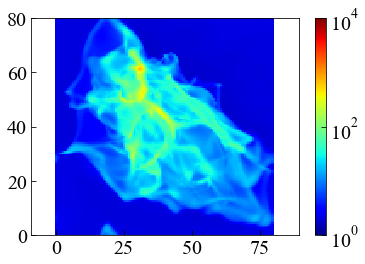

In [82]:
i = 3
#dir1  = '/Users/maeda/Desktop/Dropbox/analysis/Cloud-Shock/DTF/DTFm10-d09/'

folder1="RHO"  #+ str(np.int(sample_frequency)) 
#folder2="Phiexa"  #+ str(np.int(sample_frequency)) 

#h5file1 = h5py.File(dir1+'Init-rho.h5',"r")
h5file1 = h5py.File(dir+'DTAllHDF017.h5',"r")


#データ読み込み
Phiwv1to1  = h5file1[folder1+"/RHO"].value


#data01=Phiwv1to1[:,:,256]
data01=Phiwv1to1.sum(axis=0)
data01=data01*dl*(3.0*10.0**18.0)**3.0 * 1.67*10.0**(-24.0)/(2.0*10.0**(33.0))

x = np.arange(0.0, 80.1, 80.0/128.0)
y = np.arange(0.0, 80.1, 80.0/128.0)


fig = plt.figure()
ax1 = fig.add_subplot(111)

mappable0 = ax1.pcolormesh(x,y,data01,cmap='jet', vmin=1, vmax=10000,norm=LogNorm()) # ここがポイント！
pp = fig.colorbar(mappable0, ax=ax1, orientation="vertical")
#plt.gca().set_aspect('equal')
ax1.set_aspect('equal', adjustable='box')
#plt.clim(1, 10000.0)

#plt.plot(stx,sty,'o',ms=4,color='#000000')


plt.axes().set_aspect('equal', 'datalim')
plt.savefig("columntot.png")
plt.savefig("foo.png")

In [61]:
VX1 = h5file1["V/VX"].value
VY1 = h5file1["V/VY"].value
VZ1 = h5file1["V/VZ"].value

nb1=np.count_nonzero(VX1 != 0.0)

disvx=np.var(VX1)
disvy=np.var(VY1)
disvz=np.var(VZ1)
print(disvx,disvy,disvz)


Disp1=VX1*VX1+VY1*VY1+VZ1*VZ1
Disp1x=VX1*VX1
Disp1y=VY1*VY1
Disp1z=VZ1*VZ1

sDisp1=np.sum(Disp1)
sDisp1x=np.sum(Disp1x)
#sDisp1y=np.sum(Disp1y)
#sDisp1z=np.sum(Disp1z)
svx1=np.sum(VX1)/nb1
svy1=np.sum(VY1)/nb1
svz1=np.sum(VZ1)/nb1
fDisp1=np.sqrt(sDisp1/ nb1 -svx1*svx1-svy1*svy1-svz1*svz1)
fDisp1x=np.sqrt(sDisp1x/ nb1 -svx1*svx1)

print(fDisp1,svx1,svy1,svz1)

0.91423 1.0536665 1.0330336
6.699279407237253 -0.17597945431243447 0.7771816151474784 -0.6012023456608141


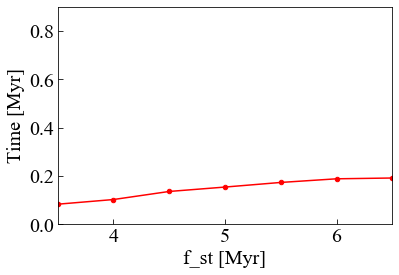

In [81]:
sttot=[0] *14
time=[0] *14
time = np.arange(0.0, 6.6, 0.5)


sttot[ 0]=0.0
sttot[ 1]=0.0
sttot[ 2]=0.0
'''
sttot[ 3]=840.84832064007435
sttot[ 4]=1490.0824540204821
sttot[ 5]=3365.049731575969
sttot[ 6]=5200.5070153164033
sttot[ 7]=8315.1608552914768
sttot[ 8]=10248.36568129881
sttot[ 9]= 13591.302801012585
sttot[10]=15413.432931108267
sttot[11]=17324.18223769969
sttot[12]=18832.535371133788
sttot[13]=19160.898719243523
'''
sttot[ 3]=840.84832064007435/100000.0
sttot[ 4]=1490.0824540204821/100000.0
sttot[ 5]=3365.049731575969/100000.0
sttot[ 6]=5200.5070153164033/100000.0
sttot[ 7]=8315.1608552914768/100000.0
sttot[ 8]=10248.36568129881/100000.0
sttot[ 9]= 13591.302801012585/100000.0
sttot[10]=15413.432931108267/100000.0
sttot[11]=17324.18223769969/100000.0
sttot[12]=18832.535371133788/100000.0
sttot[13]=19160.898719243523/100000.0


fig = plt.figure()
ax = fig.add_subplot(111)

plt.rcParams["font.family"] = "Times New Roman"      #全体のフォントを設定
plt.rcParams["xtick.direction"] = "in"               #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams["ytick.direction"] = "in"               #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
#plt.rcParams["xtick.minor.visible"] = True          #x軸補助目盛りの追加
#plt.rcParams["ytick.minor.visible"] = True          #y軸補助目盛りの追加
#plt.rcParams["xtick.major.width"] = 1.5              #x軸主目盛り線の線幅
#plt.rcParams["ytick.major.width"] = 1.5              #y軸主目盛り線の線幅
#plt.rcParams["xtick.minor.width"] = 1.0              #x軸補助目盛り線の線幅
#plt.rcParams["ytick.minor.width"] = 1.0              #y軸補助目盛り線の線幅
plt.rcParams["xtick.major.size"] = 5                #x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 5                #y軸主目盛り線の長さ
#plt.rcParams["xtick.minor.size"] = 5                #x軸補助目盛り線の長さ
#plt.rcParams["ytick.minor.size"] = 5                #y軸補助目盛り線の長さ
plt.rcParams["font.size"] = 20                       #フォントの大きさ
#plt.rcParams["axes.linewidth"] = 1.5                 #囲みの太さ
plt.xlim([3.5, 6.5]) # x方向の描画範囲を指定
plt.ylim([0.0, 0.9]) # y方向の描画範囲を指定



plt.scatter(time, sttot, s=20.0,c='red')
plt.plot(time, sttot,linestyle='solid',color='red')

ax.set_xlabel('f_st [Myr]')
ax.set_ylabel('Time [Myr]')


#plt.plot(time, sttot ,c='purple',label='$-3$')


# 保存するPDFファイル名
pp = PdfPages('/Users/maeda/Desktop/F_st.pdf')
# 画像をPDFとして保存する
pp.savefig(fig, bbox_inches='tight')
# PDFの保存終了
pp.close()




AttributeError: 'float' object has no attribute 'view'

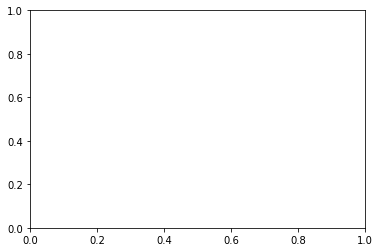

In [9]:

#fig, ax = plt.subplots()
fig = plt.figure()
ax1 = fig.add_subplot(111)
for i in range(itime,ftime +1,timejump): #最後は含まない
    #f90 = open(dir+'All/All'+"%03.f"%(i)+'.DAT', 'rb')
    f90 = open(dir+'CLALL'+"%03.f"%(i)+'.DAT', 'rb')
    #f90 = open(dir+'dbug-ok/Alldphi'+"%03.f"%(i)+'.DAT', 'rb')
    #f90 = open(dir+'All/All'+"%03.f"%(i)+'.DAT', 'rb')
    #f90 = open(dir+'tag/tag'+"%03.f"%(i)+'003.DAT', 'rb')
    #f90 = open(dir+'All/All'+"%03.f"%(i)+'.DAT', 'rb')
    #f90 = open(dir+'Clmpanly/CN098001.DAT', 'rb')
    #f90 = open(dir+'AllD.DAT', 'rb')
    ary = np.fromfile(f90, np.float32,count=im*jm*km*num) #count=im*jm*dim*nstep
    #ary = np.fromfile(f90, np.int32,count=im*jm*km*num)
    #print(ary)
    uvhpy = ary.reshape(num,im,jm,km, order='F')
    #print(uvhpy)

    #slice2=uvhpy[1,:,:,:]
    slice1=uvhpy[0,:,:,:]
    slice2=uvhpy[1,:,:,:]
    slice3=uvhpy[2,:,:,:]
    slice4=uvhpy[3,:,:,:]
    slice5=uvhpy[4,:,:,:]
    slice6=uvhpy[5,:,:,:]
    #slice7=uvhpy[6,:,:,:]
    '''
    slice8=uvhpy[7,:,:,:]
    slice9=uvhpy[8,:,:,:]
    slice10=uvhpy[9,:,:,:]
    slice11=uvhpy[10,:,:,:]
    slice12=uvhpy[11,:,:,:]
    slice13=uvhpy[12,:,:,:]
    slice14=uvhpy[13,:,:,:]
    slice15=uvhpy[14,:,:,:]
    slice16=uvhpy[15,:,:,:]
    slice17=uvhpy[16,:,:,:]
    slice18=uvhpy[17,:,:,:]
    '''
    s1=slice1.sum(axis=0)
    #s1=s1/1.27*0.78*3*10**18
    s1=s1*dl*(3*10**18)**3 * 1.67*10**(-24)/(2.0*10**(33))
    #s9=slice9.sum(axis=0)
    #s9=s9*0.78*3*10**18
    #s11=slice11.sum(axis=0)
    #s11=s11*0.78*3*10**18
    """
    s2=slice2.sum(axis=3)
    s3=slice3.sum(axis=3)
    s4=slice4.sum(axis=3)
    s5=slice5.sum(axis=3)
    s6=slice6.sum(axis=3)
    s7=slice7.sum(axis=3)
    s8=slice8.sum(axis=3)
    s9=slice9.sum(axis=3)
    s10=slice10.sum(axis=3)
    s11=slice11.sum(axis=3)
    s12=slice12.sum(axis=3)
    s13=slice13.sum(axis=3)
    s14=slice14.sum(axis=3)
    s15=slice15.sum(axis=3)
    s16=slice16.sum(axis=3)
    s17=slice17.sum(axis=3)
    s18=slice18.sum(axis=3)
    """

    bx = np.arange(im)
    by = np.arange(jm)

    #P=P*116.0
    #Rho=Rho/1.27

    #c1,c2,c3,c4 = "blue","green","red","black"      # 各プロットの色
    #l1,l2,l3,l4 = "sin","cos","abs(sin)","sin**2"   # 各ラベル

    x = np.arange(0, im) #x軸の描画範囲の生成。0から10まで0.05刻み。
    y = np.arange(0, jm) #y軸の描画範囲の生成。0から10まで0.05刻み。
    #ax.set_xlabel('n')  # x軸ラベル
    #ax.set_ylabel('p/k_{B}')  # y軸ラベル
    #ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
    # ax.set_aspect('equal') # スケールを揃える
    #ax.grid()            # 罫線
    #plt.yscale('log')
    #plt.xscale('log')
    #ax.set_xlim([0.01, 1000]) # x方向の描画範囲を指定
    #ax.set_ylim([1, 100000])    # y方向の描画範囲を指定
    #ax.plot(t, y1, color=c1, label=l1)
    #ax.plot(t, y2, color=c2, label=l2)
    #ax.plot(t, y3, color=c3, label=l3)
    #ax.plot(t, y4, color=c4, label=l4)
    #ax.legend(loc=0)    # 凡例
    #fig.tight_layout()  # レイアウトの設定
    # plt.savefig('hoge.png') # 画像の保存
    #plt.show()

    mappable0 = ax1.pcolormesh(x,y,s1, cmap='jet', norm=LogNorm()) # ここがポイント！
    pp = fig.colorbar(mappable0, ax=ax1, orientation="vertical")
    plt.axes().set_aspect('equal', 'datalim')
    plt.savefig("columntot.png")
    '''
    mappable0 = ax1.pcolormesh(x,y,s9, cmap='coolwarm', norm=LogNorm()) # ここがポイント！
    pp = fig.colorbar(mappable0, ax=ax1, orientation="vertical")
    plt.axes().set_aspect('equal', 'datalim')
    plt.savefig("columnh1.png")

    mappable0 = ax1.pcolormesh(x,y,s11, cmap='coolwarm', norm=LogNorm()) # ここがポイント！
    pp = fig.colorbar(mappable0, ax=ax1, orientation="vertical")
    plt.axes().set_aspect('equal', 'datalim')
    plt.savefig("columnh2.png")
    '''

    plt.savefig("foo"+"%03.f"%(i)+".png")